# Exploration of the Dataset of Funerary Inscriptions

The most of the inscriptions (68,368) come from Rome, followed by Africa proconsularis (16,984) and Numidia (11,314). A plot shows the distribution of the inscriptions over the provinces excluding Rome.

The chronology of funerary inscriptions is usually quite controversial. The inscriptions extracted from EDCS have a time range between 400 BCE and 2009 CE. The most frequent raw_spantime is 301 to 500 CE (12,975), followed by 101 to 200 (9,676) and  301 to 400 CE (8,375).

The inscriptions in the dataset are dated to the Republican, Imperial, Late Imperial and Christian period.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
##open the dataset of funerary inscriptions (172,958 rows)
Inscriptions = pd.read_csv("/Users/u0154817/OneDrive - KU Leuven/Documents/ICLL Prague June 2023/Output/Tituli_Sepulcrales_new.csv")

In [3]:
len(Inscriptions)

172958

In [4]:
Inscriptions['dating_from'] = Inscriptions['dating_from'].astype('Int64')
Inscriptions['dating_to'] = Inscriptions['dating_to'].astype('Int64')
Inscriptions['date_not_before'] = Inscriptions['date_not_before'].astype('Int64')
Inscriptions['date_not_after'] = Inscriptions['date_not_after'].astype('Int64')

Inscriptions.head(5)

,index,EDCS-ID,publication,province,place,dating_from,dating_to,date_not_before,date_not_after,status,...,material,comment,latitude,longitude,language,photo,partner_link,extra_text,extra_html,raw_dating
0,0,EDCS-24700151,"CIL 01, 02650 (p 1097) = IG-05-01, 00741 = ILL...",Achaia,Afesou,<NA>,<NA>,<NA>,<NA>,praenomen et nomen; tituli sepulcrales; viri,...,lapis,NaN,NaN,NaN,NaN,NaN,http://db.edcs.eu/epigr/partner.php?s_language...,NaN,NaN,NaN
1,1,EDCS-31400026,"CIL 03, 12291",Achaia,Anthedon,-100,200,-100,200,praenomen et nomen; tituli sepulcrales; viri,...,lapis,NaN,38.497344,23.453217,NaN,NaN,http://db.edcs.eu/epigr/partner.php?s_language...,NaN,NaN,-100 to 200
2,2,EDCS-26001122,"CIL 03, 14203,14 = CIL 01, 02228 (p 1096) = IG...",Achaia,Argos,-100,200,-100,200,liberti/libertae; mulieres; tituli sepulcrales,...,lapis,NaN,37.635311,22.725952,NaN,NaN,http://db.edcs.eu/epigr/partner.php?s_language...,NaN,NaN,-100 to 200
3,3,EDCS-29600002,ILGR 00085,Achaia,Argos,101,200,101,200,mulieres; tituli sepulcrales; viri,...,NaN,NaN,37.635311,22.725952,NaN,NaN,http://db.edcs.eu/epigr/partner.php?s_language...,NaN,NaN,101 to 200
4,4,EDCS-29600003,ILGR 00086,Achaia,Argos,101,200,101,200,tituli sepulcrales,...,NaN,NaN,37.635311,22.725952,NaN,NaN,http://db.edcs.eu/epigr/partner.php?s_language...,NaN,NaN,101 to 200


In [5]:
##count the inscriptions per province (top 10)
provinces = Inscriptions["province"].value_counts()
provinces.head(10)

Roma                            68368
Africa proconsularis            16984
Numidia                         11314
Latium et Campania / Regio I    11225
Dalmatia                         6384
Venetia et Histria / Regio X     5333
Hispania citerior                4272
Samnium / Regio IV               3561
Mauretania Caesariensis          3444
Lusitania                        3282
Name: province, dtype: int64

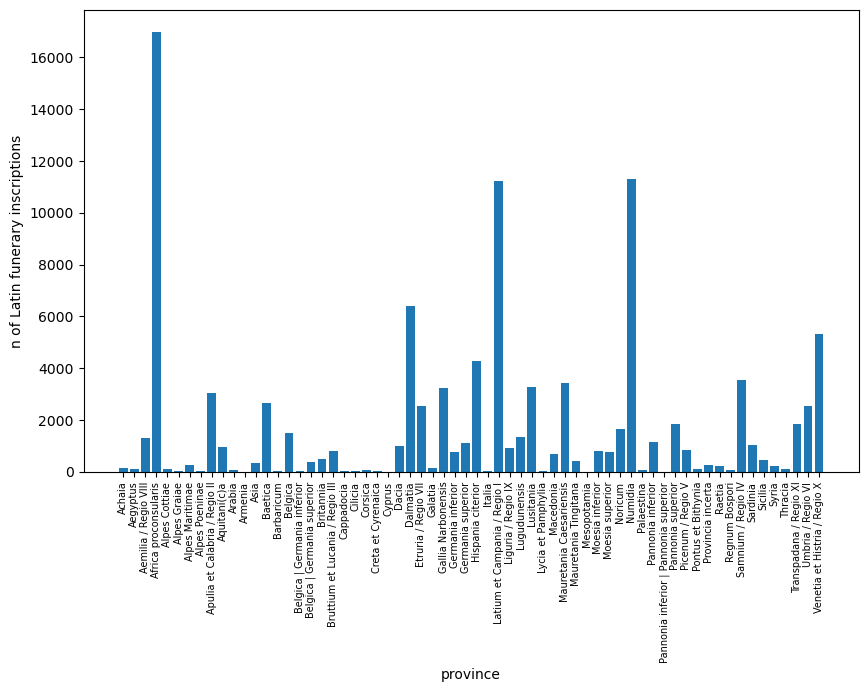

In [6]:
##exclude 'Rome' from the plot
value_counts_excluded = provinces.iloc[1:]

##sort the count_dictionary by province name in alphabetic order
value_counts_excluded = dict(sorted(value_counts_excluded.items()))

plt.figure(figsize=(10, 6))

plt.bar(value_counts_excluded.keys(), value_counts_excluded.values())
plt.xticks(rotation=90, fontsize=7)

plt.xlabel('province')
plt.ylabel('n of Latin funerary inscriptions')

##show the plot
plt.show()

In [7]:
##minimum value in the column 'dating_from'
dating_from_values = Inscriptions['dating_from'].dropna() ##drop out all the rows without date indication
dating_from_values.min()

-400

In [8]:
##maximum value in the column 'dating_from'
dating_to_values = Inscriptions['dating_to'].dropna() ##drop out all the rows without date indication
dating_to_values.max()

2009

In [9]:
time_span = Inscriptions["raw_dating"].value_counts()
time_span.head(60)

301 to 500     12975
101 to 200      9676
301 to 400      8375
1 to 100        6280
201 to 300      3933
1 to 50         3690
101 to 300      3359
151 to 300      2494
1 to 200        2329
401 to 500      2247
351 to 400      2061
51 to 100       1632
51 to 200       1556
301 to 350      1514
326 to 375      1510
1 to 300        1434
101 to 150      1428
171 to 230      1358
51 to 150       1283
151 to 250      1269
291 to 325      1258
151 to 200      1241
71 to 130       1215
1 to 150         860
391 to 425       842
-50 to -1        728
201 to 250       727
251 to 300       694
71 to 200        686
-30 to 30        677
171 to 300       671
31 to 70         654
101 to 250       611
71 to 150        525
301 to 600       500
71 to 100        485
131 to 170       481
401 to 600       468
151 to 230       376
101 to 230       376
171 to 250       372
-30 to 117       368
-100 to -1       363
1 to 30          359
-50 to 50        351
1 to 70          340
171 to 200       340
101 to 130   